In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [8]:
! mkdir "nyc-taxi-trip-duration"

mkdir: cannot create directory ‘nyc-taxi-trip-duration’: File exists


In [9]:
df = pd.read_csv("nyc-taxi-trip-duration/train.csv")
df.head()
df.shape

(1458644, 11)

In [ ]:
##  missing values

In [10]:
print("\nMissing values in each column are as follows:")
print(df.isnull().sum())


Missing values in each column are as follows:
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [11]:
print("\nData types of each column are as follows:")
print(df.dtypes)



Data types of each column are as follows:
id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object




# Summary of data

In [12]:
print("\nSummary statistics for numerical columns are as follows:")
print(df.describe())


Summary statistics for numerical columns are as follows:
          vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02  


# Three distinct types of graphs using Matplotlib are as follows

# 1.Scatter Plot for Pickup and Drop-off Locations:

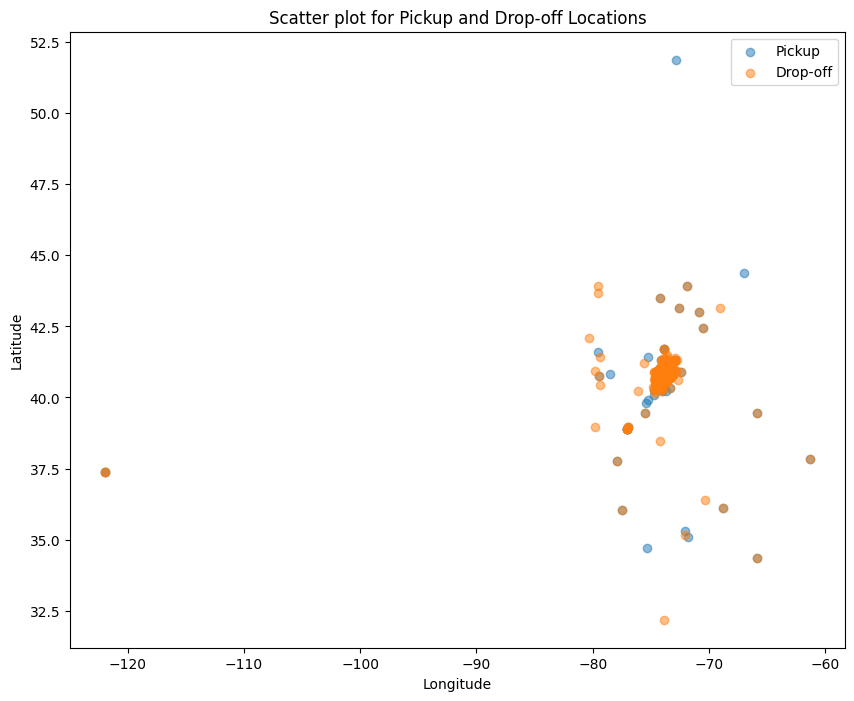

In [13]:
import matplotlib.pyplot as plt

# Scatter plot for pickup and drop-off locations is as follows
plt.figure(figsize=(10, 8))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], label='Pickup', alpha=0.5)
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], label='Drop-off', alpha=0.5)
plt.title('Scatter plot for Pickup and Drop-off Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


# 2. Histogram for Passenger Count:

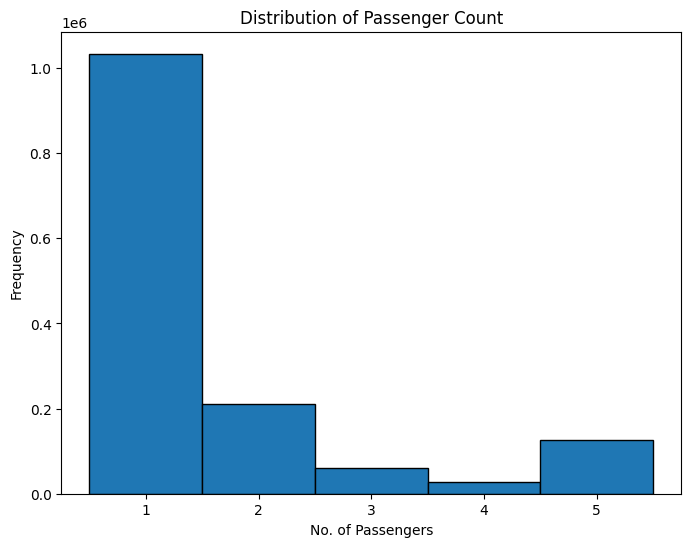

In [14]:
import matplotlib.pyplot as plt

# Histogram for passenger count
plt.figure(figsize=(8, 6))
plt.hist(df['passenger_count'], bins=range(1, 7), edgecolor='black', align='left')
plt.title('Distribution of Passenger Count')
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')
plt.show()



# 3. Bar Plot for Vendor ID and Trip Duration:

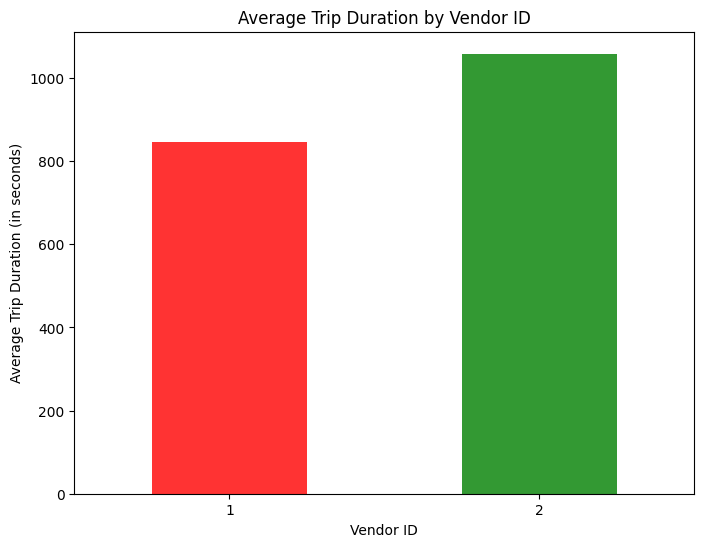

In [16]:
import matplotlib.pyplot as plt

# Bar plot for vendor ID and average trip duration
average_duration_by_vendor = df.groupby('vendor_id')['trip_duration'].mean()

plt.figure(figsize=(8, 6))
average_duration_by_vendor.plot(kind='bar', color=['red', 'green'], alpha=0.8)
plt.title('Average Trip Duration by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Average Trip Duration (in seconds)')
plt.xticks(rotation=0)
plt.show()
